In [1]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 180)

In [17]:
library(tidyverse)
library(lubridate)

Warning message:
“package ‘lubridate’ was built under R version 3.6.2”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Preparation

In [4]:
setwd("/Users/chaodai/qBio/BSD-QBio6/tutorials/basic_computing_2/")

In [40]:
flu = read_csv('PreisMoat2014.csv')

Parsed with column specification:
cols(
  WeekCommencing = col_date(format = ""),
  WeeklyOutpatientVisitsforILI = col_double(),
  GoogleFluTrends = col_double()
)



# analysis

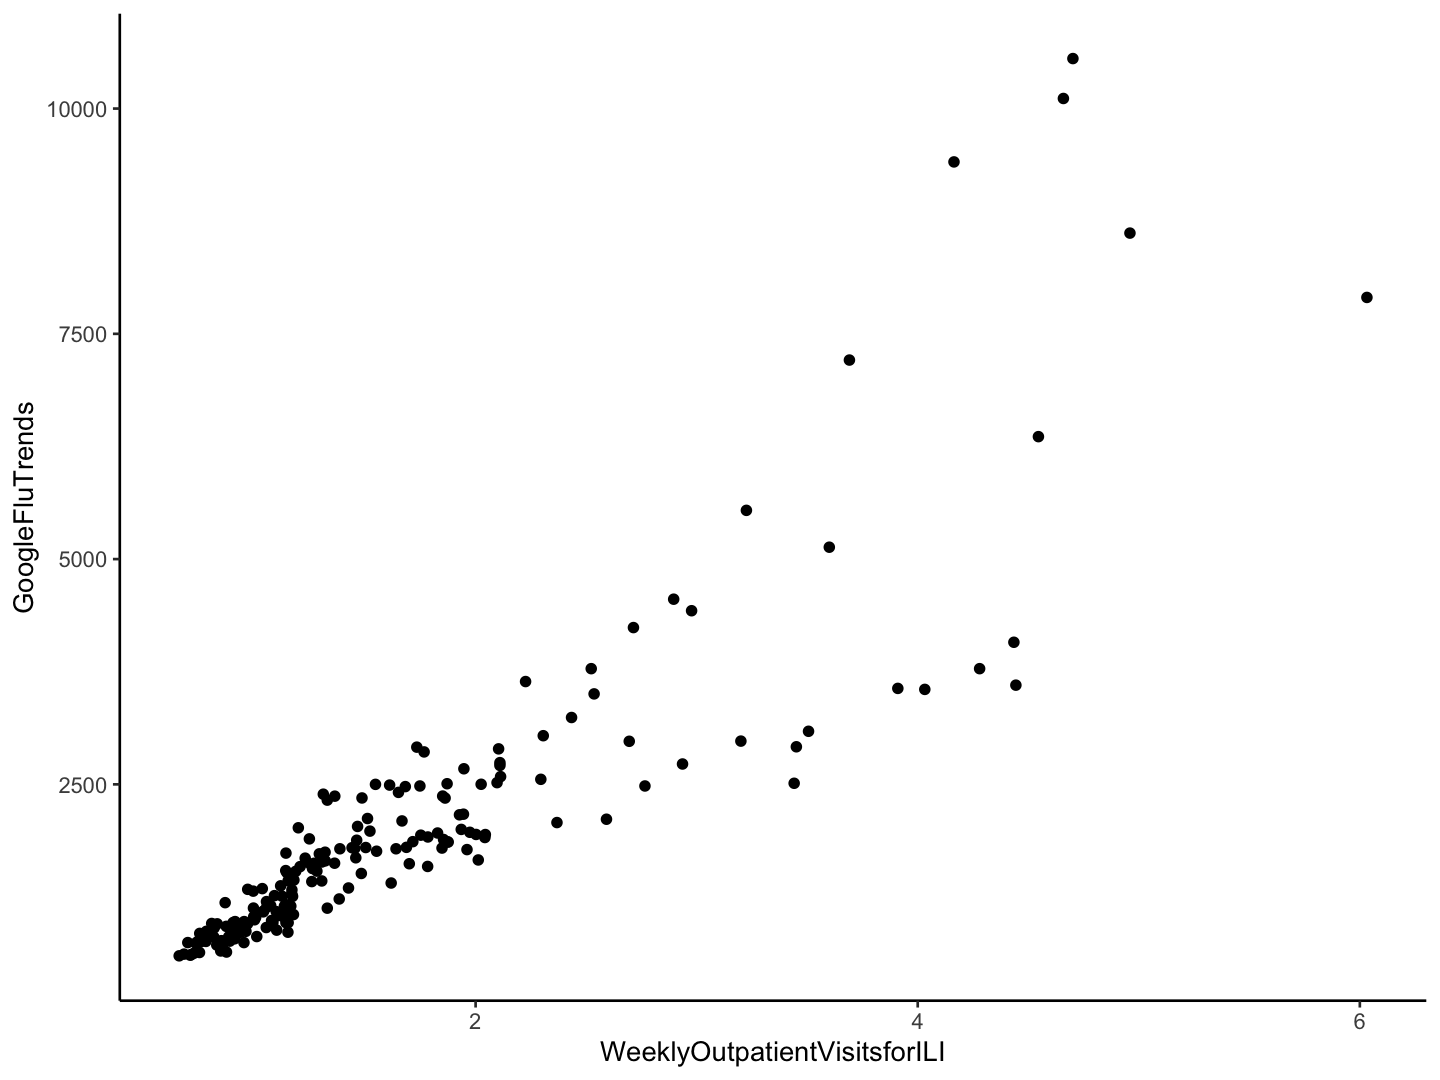

In [10]:
ggplot(flu) + geom_point(aes(WeeklyOutpatientVisitsforILI, GoogleFluTrends)) +
    theme_classic()

In [34]:
select(flu, -1) %>%
    cor(method = 'pearson')

,WeeklyOutpatientVisitsforILI,GoogleFluTrends
WeeklyOutpatientVisitsforILI,1.0000000,0.8829649
GoogleFluTrends,0.8829649,1.0000000


#### correlation before 8/2013


In [30]:
filter(flu, WeekCommencing < '2013-08-01') %>% 
    select(-WeekCommencing) %>%
    cor

,WeeklyOutpatientVisitsforILI,GoogleFluTrends
WeeklyOutpatientVisitsforILI,1.0000000,0.8814023
GoogleFluTrends,0.8814023,1.0000000


#### correlation after 8/2013

Looks like the cor did increase


In [35]:
filter(flu, WeekCommencing >= '2013-08-01') %>% 
    select(-WeekCommencing) %>%
    cor

,WeeklyOutpatientVisitsforILI,GoogleFluTrends
WeeklyOutpatientVisitsforILI,1.0000000,0.9616516
GoogleFluTrends,0.9616516,1.0000000


In [41]:
flu = mutate(flu, year = year(WeekCommencing), month = month(WeekCommencing)) # adding month and year

Correlation is higher for September in 2013, but not for August. 

In [82]:
filter(flu, month %in% c(8, 9)) %>% 
    select(WeeklyOutpatientVisitsforILI, GoogleFluTrends, year, month) %>%
    group_by(month, year) %>%
    summarise(cor = cor(WeeklyOutpatientVisitsforILI, GoogleFluTrends, method = 'pearson'))

`summarise()` regrouping output by 'month' (override with `.groups` argument)



month,year,cor
<dbl>,<dbl>,<dbl>
8,2010,0.73102387
8,2011,0.95769851
8,2012,0.91424884
8,2013,0.86689362
9,2010,0.01744115
9,2011,0.94212932
9,2012,0.81082077
9,2013,0.99999229
